In [20]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error

In [22]:
from keras.datasets import fashion_mnist
(x_data,y_data),(tt_x,tt_y)=fashion_mnist.load_data()

In [23]:
tr_x,val_x,tr_y,val_y=train_test_split(x_data,y_data,test_size=0.2)

In [26]:
s_tr_x=tr_x/255
s_tt_x=tt_x/255
s_val_x=val_x/255

In [27]:
e_tr_x=s_tr_x.reshape(-1, 28, 28,1)
e_tt_x=s_tt_x.reshape(-1, 28, 28,1)
e_val_x=s_val_x.reshape(-1, 28, 28,1)

In [30]:
from keras.utils import to_categorical
e_tr_y=to_categorical(tr_y)
e_tt_y=to_categorical(tt_y)
e_val_y=to_categorical(val_y)

In [32]:
#e_tr_y=tr_y.reshape(-1,1)

In [34]:
e_tr_x.shape,e_tr_y.shape

((48000, 28, 28, 1), (48000, 10))

In [36]:
#모델(CNN)
m=Sequential()
m.add(Input(shape=e_tr_x.shape[1:]))#(28,28,1)
m.add(Conv2D(32,3,1,padding='same',activation='relu'))#(28,28,32)
m.add(MaxPooling2D(2))#(14,14,32)
m.add(Conv2D(64,3,1,padding='same',activation='relu'))#(14,14,64)
m.add(MaxPooling2D(2))#(7,7,64)
m.add(Conv2D(128,3,1,padding='same',activation='relu'))#(7,7,128)
m.add(MaxPooling2D(2))#(3,3,128)
m.add(Conv2D(256,3,1,padding='same',activation='relu'))#(3,3,256)
m.add(MaxPooling2D(2))#(1,1,256)
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 414,550 (1.58 MB)

 Trainable params: 414,550 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
m.compile(loss='categorical_crossentropy',metrics=['acc'])

In [40]:
m_ck1=ModelCheckpoint('best_m.keras',save_best_only=True)
m_ck2=ModelCheckpoint('best_m.weights.h5',save_weights_only=True)

In [42]:
hy=m.fit(e_tr_x,e_tr_y,validation_split=0.2,epochs=10,callbacks=[m_ck1,m_ck2])

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.7096 - loss: 0.7644 - val_acc: 0.8757 - val_loss: 0.3433
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - acc: 0.8815 - loss: 0.3230 - val_acc: 0.8978 - val_loss: 0.2815
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - acc: 0.9020 - loss: 0.2638 - val_acc: 0.9079 - val_loss: 0.2732
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.9193 - loss: 0.2217 - val_acc: 0.9097 - val_loss: 0.2572
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - acc: 0.9250 - loss: 0.2022 - val_acc: 0.9148 - val_loss: 0.2531
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - acc: 0.9356 - loss: 0.1744 - val_acc: 0.9087 - val_loss: 0.2664
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - acc: 0.9379 - loss: 0.1633 - val_acc: 0.9053 - val_loss: 0.3061
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - acc: 0.9450 - loss: 0.1475 - val_acc: 0.9164 - val_loss: 0.2902
Epoch 9/10
1200/1200 ━━━

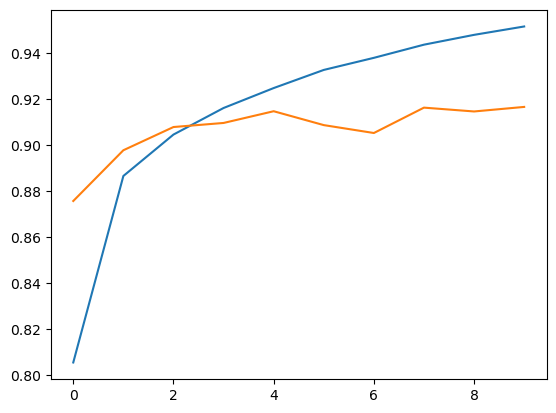

In [70]:
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])

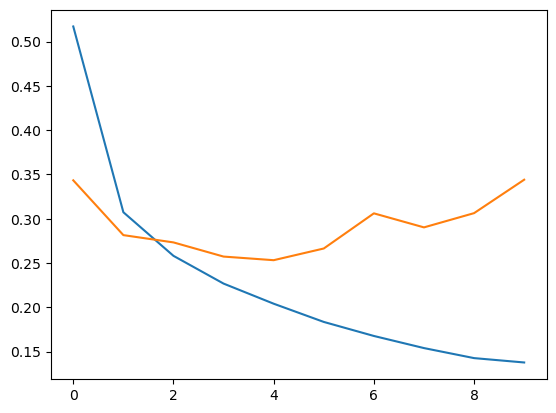

In [43]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [72]:
l_m=load_model('best_m.keras')
l_m

<Sequential name=sequential, built=True>

In [79]:
m.evaluate(e_tr_x,e_tr_y)
l_m.evaluate(e_tr_x,e_tr_y)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9646 - loss: 0.1010
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9452 - loss: 0.1500


[0.17205572128295898, 0.9382916688919067]

In [80]:
m.evaluate(e_tt_x,e_tt_y)
l_m.evaluate(e_tt_x,e_tt_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9058 - loss: 0.4023
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9094 - loss: 0.2735


[0.2670973837375641, 0.9097999930381775]

In [78]:
m.evaluate(e_val_x,e_val_y)
l_m.evaluate(e_val_x,e_val_y)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9109 - loss: 0.3556
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9141 - loss: 0.2638


[0.25585973262786865, 0.9130833148956299]

In [110]:
tr_scs=m.evaluate(e_tr_x,e_tr_y)
val_scs=m.evaluate(e_val_x,e_val_y)
tt_scs=m.evaluate(e_tt_x,e_tt_y)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9646 - loss: 0.1010
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9109 - loss: 0.3556
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9058 - loss: 0.4023


In [118]:
all_acc=abs(tr_scs[1]-val_scs[1])+abs(tr_scs[1]-tt_scs[1])+abs(tt_scs[1]-val_scs[1])
all_loss=abs(tr_scs[0]-val_scs[0])+abs(tr_scs[0]-tt_scs[0])+abs(tt_scs[0]-val_scs[0])
all_acc,all_loss

(0.09732496738433838, 0.49682122468948364)

In [112]:
tr_scs_l=l_m.evaluate(e_tr_x,e_tr_y)
val_scs_l=l_m.evaluate(e_val_x,e_val_y)
tt_scs_l=l_m.evaluate(e_tt_x,e_tt_y)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9452 - loss: 0.1500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9141 - loss: 0.2638
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9094 - loss: 0.2735


In [113]:
all_acc_l=abs(tr_scs_l[1]-val_scs_l[1])+abs(tr_scs_l[1]-tt_scs_l[1])+abs(tt_scs_l[1]-val_scs_l[1])
all_loss_l=abs(tr_scs_l[0]-val_scs_l[0])+abs(tr_scs_l[0]-tt_scs_l[0])+abs(tt_scs_l[0]-val_scs_l[0])
all_acc_l,all_loss_l

(0.056983351707458496, 0.1900833249092102)

In [106]:
py=l_m.predict(e_tt_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [107]:
ty=e_tt_y

In [55]:
print(classification_report(np.argmax(py,axis=1),np.argmax(ty,axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4736
           1       1.00      1.00      1.00      4818
           2       0.94      0.90      0.92      4980
           3       0.94      0.98      0.96      4564
           4       0.94      0.91      0.92      5029
           5       0.99      1.00      0.99      4784
           6       0.85      0.89      0.87      4589
           7       0.99      0.97      0.98      4961
           8       1.00      0.99      0.99      4835
           9       0.98      0.99      0.99      4704

    accuracy                           0.96     48000
   macro avg       0.95      0.96      0.95     48000
weighted avg       0.96      0.96      0.96     48000



In [140]:
tr_y[2]

5

In [156]:

out=l_m.predict(np.array([e_tr_x[2]]))
print(np.argmax(out,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[5]


In [124]:
e_tr_x[0].shape

(28, 28, 1)

In [183]:
tr_x.reshape(-1,28,28,1)[0].shape

(28, 28, 1)

In [203]:
len(tr_x.reshape(-1,28,28,1).shape)

4

In [241]:
# 사용 
# 전처리기(함수)-일차 가이드를 주자
#이미지는 크기는 알맞게 단채널로 들어온다
#1. /255
#전처리기
def 전처리기(이미지):
    전처리된_이미지=이미지/255
    if len(전처리된_이미지.shape)>3:
        return 전처리된_이미지
    else:
        return np.array([전처리된_이미지])
완성된_모델=l_m
#후처리기
def 후처리기(모델의_출력):
    import numpy as np
    정답=np.array(['티셔츠 상의','바지','풀오버','드레스','코트','샌들','셔츠','운동화','가방','앵클 부츠'])
    if len(모델의_출력)>1:
        디코딩된_결과=정답[np.argmax(모델의_출력,axis=1)]
    else:
        디코딩된_결과=정답[np.argmax(모델의_출력)]
    return 디코딩된_결과

In [243]:
def 완성된_예측기(입력_이미지):
    전처리된_이미지=전처리기(입력_이미지)
    출력=완성된_모델.predict(전처리된_이미지)
    결과=후처리기(출력)
    return 결과

In [245]:
완성된_예측기(tr_x.reshape(-1,28,28,1)[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'가방'

In [239]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error
#데이터 준비
from keras.datasets import mnist,fashion_mnist

In [5]:
(X,y),(_,_)=fashion_mnist.load_data()

# 완성된 모델로 이미지 예측기를 만드시오
1. 전처리 내용
2. 모델선정 검증
3. 후처리 내용
4. 예측기의 함수는 1개로 통합

In [248]:
#모델(CNN)
m=Sequential()
m.add(Input(shape=e_tr_x.shape[1:]))#(28,28,1)
m.add(Conv2D(32,3,1,padding='same',activation='relu'))#(28,28,32)
m.add(MaxPooling2D(2))#(14,14,32)
m.add(Conv2D(64,3,1,padding='same',activation='relu'))#(14,14,64)
m.add(MaxPooling2D(2))#(7,7,64)
m.add(Conv2D(128,3,1,padding='same',activation='relu'))#(7,7,128)
m.add(MaxPooling2D(2))#(3,3,128)
m.add(Conv2D(256,3,1,padding='same',activation='relu'))#(3,3,256)
m.add(MaxPooling2D(2))#(1,1,256)
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 414,550 (1.58 MB)

 Trainable params: 414,550 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [258]:
m.layers[0].weights[0]
m.layers[0].weights[1]

<KerasVariable shape=(32,), dtype=float32, path=sequential_1/conv2d_4/bias>

In [266]:
l_m.layers[0].weights[0]
l_m.layers[0].weights[1]

<KerasVariable shape=(32,), dtype=float32, path=conv2d/bias>

In [276]:
l_m

<Sequential name=sequential, built=True>

In [270]:
from keras.applications import VGG16,vgg16

In [274]:
VGG16

<function keras.src.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='vgg16')>

In [280]:
vgg16

<module 'keras.api.applications.vgg16' from 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\keras\\api\\applications\\vgg16\\__init__.py'>

In [282]:
m=VGG16()
m

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


<Functional name=vgg16, built=True>

In [284]:
m.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
include_top=True, weights='imagenet', 
input_tensor=None, input_shape=None, pooling=None, 
classes=1000, classifier_activation='softmax', name='vgg16'

In [286]:
m

<Functional name=vgg16, built=True>

In [290]:
from keras.datasets import cifar10
(x,y),(tt_x,tt_y)=cifar10.load_data()

In [294]:
tr_x,val_x,tr_y,val_y=train_test_split(x,y,test_size=0.2)

In [296]:
tr_x.shape,tt_x.shape,val_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [298]:
e_tr_y=to_categorical(tr_y)
e_tr_y.shape

(40000, 10)

In [302]:
m=VGG16(include_top=False,input_shape=(32,32,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [304]:
m.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [308]:
vgg_16=m

In [318]:
m=Sequential()
m.add(Input(shape=(32,32,3)))
m.add(vgg_16)
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [320]:
m.predict(tr_x)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 74ms/step


array([[3.21495298e-30, 1.08863014e-06, 8.69475126e-01, ...,
        9.64043689e-12, 2.12920652e-22, 1.17151154e-04],
       [4.05988243e-23, 2.72801131e-01, 7.17172563e-01, ...,
        1.00263041e-02, 1.61551386e-15, 3.10920768e-11],
       [1.14614453e-23, 4.31205012e-13, 2.00572796e-03, ...,
        4.70518771e-08, 9.78099546e-11, 1.31899335e-15],
       ...,
       [1.27803898e-12, 4.27423749e-13, 1.59681383e-11, ...,
        6.37745798e-01, 5.38215111e-16, 1.07362490e-13],
       [2.45678148e-28, 2.90168446e-05, 4.79445583e-16, ...,
        7.84248222e-14, 1.46111975e-12, 9.99971032e-01],
       [1.35526399e-11, 4.94237989e-04, 3.54083441e-02, ...,
        4.68681517e-11, 1.07325161e-06, 7.61573613e-01]], dtype=float32)

In [330]:
vgg_16.layers[1].trainable=False

In [334]:
vgg_16.layers[3].trainable

True

In [340]:
vgg_16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,712,896 (56.13 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [344]:
for i in range(len(vgg_16.layers)):
    vgg_16.layers[i].trainable=False

In [346]:
for i in vgg_16.layers:
    print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [348]:
vgg16_1=VGG16(include_top=False,input_shape=(32,32,3))

In [350]:
for i in vgg16_1.layers:
    print(i.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [352]:
m=Sequential()
m.add(Input(shape=(32,32,3)))
m.add(vgg16_1)
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [358]:
m.layers[0].trainable=False

In [360]:
for i in m.layers:
    print(i.trainable)

False
True
True


In [362]:
for i in vgg16_1.layers:
    print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [364]:
m.compile(loss='sparse_categorical_crossentropy',metrics=['acc'])

In [366]:
tr_x.shape,tt_x.shape,val_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [368]:
m.fit(tr_x,tr_y,epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 74ms/step - acc: 0.3688 - loss: 9.6233
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - acc: 0.5371 - loss: 2.6887
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 75ms/step - acc: 0.5442 - loss: 2.1412
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 75ms/step - acc: 0.5461 - loss: 2.0571
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - acc: 0.5501 - loss: 2.0282
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - acc: 0.5508 - loss: 2.0034
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - acc: 0.5504 - loss: 2.0021
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - acc: 0.5501 - loss: 2.0156
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - acc: 0.5557 - loss: 2.0059
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - acc: 0.5555 - loss: 2.0206


In [370]:
vgg16_2=VGG16(include_top=False,input_shape=(32,32,3))

In [374]:
m=Sequential()
m.add(Input(shape=(32,32,3)))
m.add(vgg16_2)
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
Adam(learning_rate=)b

In [378]:
adam=Adam(learning_rate= 0.00001)

In [380]:
m.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['acc'])
m.fit(tr_x,tr_y,epochs=10)

Epoch 1/10
  47/1250 ━━━━━━━━━━━━━━━━━━━━ 5:08 257ms/step - acc: 0.3181 - loss: 1.7845

KeyboardInterrupt: 

In [394]:
all_ck=VGG16(include_top=False,input_shape=(32,32,3))
all_ck.trainable=False
print("전부 변경")
for i in  all_ck.layers:
    print(i.trainable)
m=Sequential()
n=0
for i in all_ck.layers:
    if n>14:
        i.trainable=True
    m.add(i)
    n+=1
print("일부 개방 변경")
for i in  m.layers:
    print(i.trainable)
m.summary()

전부 변경
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
일부 개방 변경
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [402]:
[j for i,j in enumerate(range(10)) if i>5]#이기능은 파이썬 언어 기반으로 동작할때만 사용된다.

[6, 7, 8, 9]

In [404]:
(_,_),(X,y)=fashion_mnist.load_data()

In [406]:
X=X.reshape(-1,28,28,1)

In [412]:
X.shape,y.shape

((10000, 28, 28, 1), (10000,))

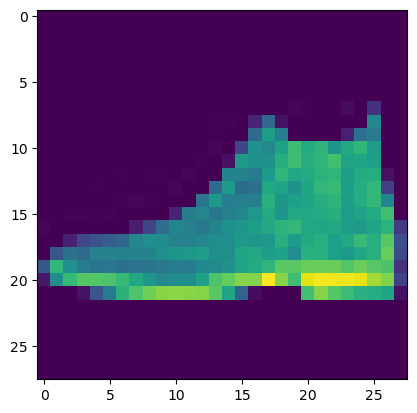

In [416]:
plt.imshow(X[0])

In [422]:
m=Sequential()
m.add(Input(shape=(28,28,1)))
m.add(Conv2D(3,3,padding='same'))
m.add(MaxPooling2D(2))
m.add(Conv2D(6,3,padding='same'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',metrics=['acc'])

In [428]:
m.layers[0].weights[0]

<KerasVariable shape=(3, 3, 1, 3), dtype=float32, path=sequential_15/conv2d_12/kernel>

In [ ]:
(28,28,1)(3, 3, 1, 3)

In [430]:
m.layers[2].weights[0]

<KerasVariable shape=(3, 3, 3, 6), dtype=float32, path=sequential_15/conv2d_13/kernel>

In [ ]:
(14,14,3)(3, 3, 3, 6)->(14,14,6)

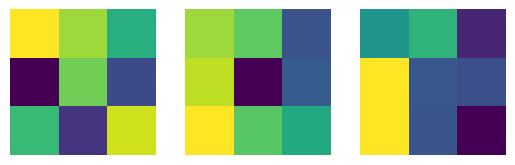

In [442]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(m.layers[0].weights[0].numpy()[:,:,:,i])
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


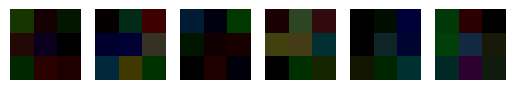

In [444]:
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(m.layers[2].weights[0].numpy()[:,:,:,i])
    plt.axis('off')
plt.show()

In [446]:
m.fit(X,y,epochs=10,verbose=2)

Epoch 1/10
313/313 - 1s - 4ms/step - acc: 0.6156 - loss: 8.0779
Epoch 2/10
313/313 - 1s - 2ms/step - acc: 0.7510 - loss: 1.6597
Epoch 3/10
313/313 - 1s - 2ms/step - acc: 0.7812 - loss: 0.8776
Epoch 4/10
313/313 - 1s - 2ms/step - acc: 0.8123 - loss: 0.5978
Epoch 5/10
313/313 - 1s - 2ms/step - acc: 0.8283 - loss: 0.4993
Epoch 6/10
313/313 - 1s - 2ms/step - acc: 0.8427 - loss: 0.4488
Epoch 7/10
313/313 - 0s - 1ms/step - acc: 0.8505 - loss: 0.4216
Epoch 8/10
313/313 - 0s - 1ms/step - acc: 0.8571 - loss: 0.4021
Epoch 9/10
313/313 - 0s - 1ms/step - acc: 0.8652 - loss: 0.3879
Epoch 10/10
313/313 - 0s - 1ms/step - acc: 0.8694 - loss: 0.3744


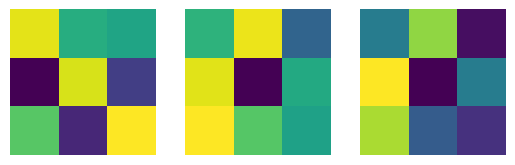

In [448]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(m.layers[0].weights[0].numpy()[:,:,:,i])
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


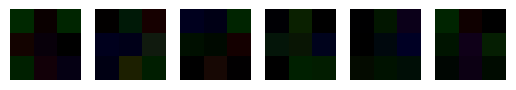

In [450]:
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(m.layers[2].weights[0].numpy()[:,:,:,i])
    plt.axis('off')
plt.show()

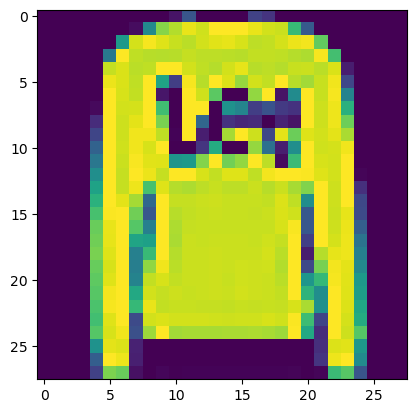

In [520]:
plt.imshow(X[1])

In [456]:
m.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_12, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_13, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_8, built=True>]

In [460]:
from keras.models import Model

In [488]:
input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_1352>

In [522]:
input=Input(shape=(28,28,1))
out=m.layers[0](input)

In [524]:
ck_m1=Model(input,out)

In [526]:
input=Input(shape=(28,28,1))
x=m.layers[0](input)
x=m.layers[1](x)
out=m.layers[2](x)

In [528]:
ck_m2=Model(input,out)

In [530]:
out_im1=ck_m1.predict(X[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [532]:
ck_1=out_im1.reshape(28,28,3)

In [534]:
ck_1.shape

(28, 28, 3)

In [536]:
out_im2=ck_m2.predict(X[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [538]:
ck_2=out_im2.reshape(14,14,6)

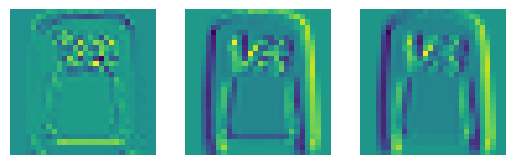

In [540]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(ck_1[:,:,i])
    plt.axis('off')

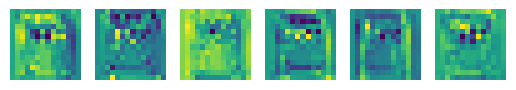

In [542]:
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(ck_2[:,:,i])
    plt.axis('off')

In [544]:
m.evaluate(X,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8757 - loss: 0.3567


[0.35367435216903687, 0.8737999796867371]

In [546]:
py=np.argmax(m.predict(X),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [548]:
py

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [552]:
ty=y

In [556]:
print(classification_report(ty,py))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.94      0.99      0.96      1000
           2       0.82      0.80      0.81      1000
           3       0.91      0.83      0.87      1000
           4       0.86      0.65      0.74      1000
           5       0.95      0.98      0.97      1000
           6       0.59      0.78      0.67      1000
           7       0.95      0.94      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [558]:
학습이_잘된_class=[5,8,7,1,9]
학습이_안된_class=[6,4]

In [570]:
#잘된
x_5=X[y==5]
x_8=X[y==8]
x_7=X[y==7]
x_1=X[y==1]
x_9=X[y==9]

In [572]:
#안된
x_6=X[y==6]
x_4=X[y==4]

In [574]:
x_5.shape

(1000, 28, 28, 1)

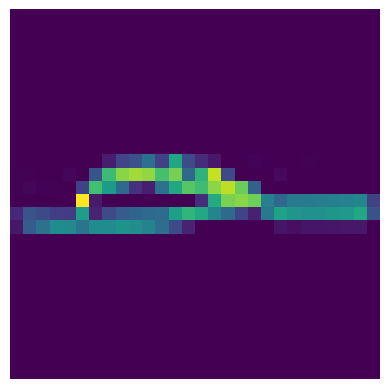

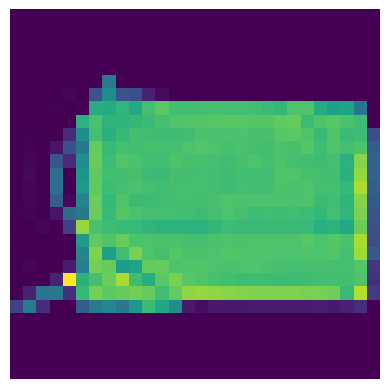

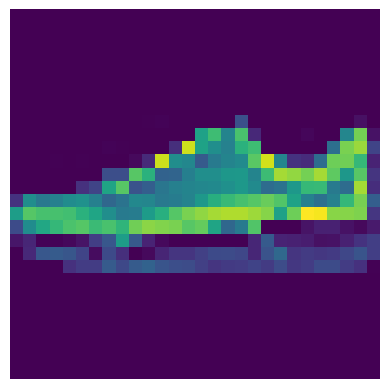

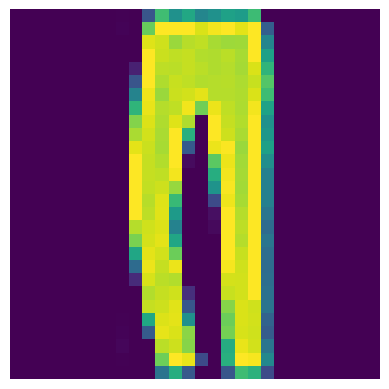

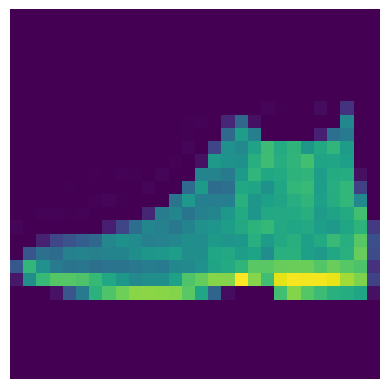

In [576]:
for i in [x_5,x_8,x_7,x_1,x_9]:
    plt.imshow(i[0])
    plt.axis('off')
    plt.show()

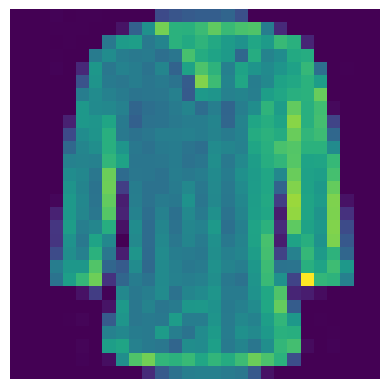

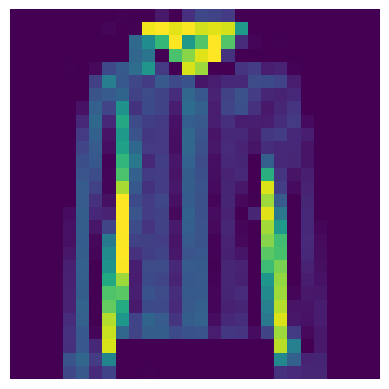

In [578]:
for i in [x_6,x_4]:
    plt.imshow(i[0])
    plt.axis('off')
    plt.show()

In [582]:
!pip install gdown

In [1]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=7deda711-4643-438d-90cd-5d6b833eca2a
To: c:\Users\ksa\Desktop\vs\pn\vision\dogs-vs-cats.zip
100%|██████████| 852M/852M [00:25<00:00, 33.8MB/s] 


'dogs-vs-cats.zip'

In [ ]:
#코랩 으로 하시는분들의 코드 

In [2]:
!unzip -qq dogs-vs-cats.zip

In [3]:
!unzip -qq train.zip

In [588]:
import os
import shutil
import pathlib

In [ ]:
old_dir=pathlib.Path('train')#기준 경로를 만들어라
new_dir=pathlib.Path('dogs-vs-cats_data')

In [ ]:
def make_subset(sub_n,s_idx,e_idx):
    for i in ['cat','dog']:
        dir=new_dir/sub_n/i
        os.makedirs(dir)
        f_ns=[f'{i}.{n}.jpg' for n in range(s_idx,e_idx)]
        for f_n in f_ns:
            shutil.copyfile(src=old_dir/f_n,dst=dir/f_n) 

In [ ]:
make_subset('tr_data',0,1000)

In [ ]:
#윈도우 로컬에서 하시는분들

In [8]:
import os
import shutil
import pathlib

In [11]:
old_dir=pathlib.Path('./dogs-vs-cats/train')#기준 경로를 만들어라

In [12]:
new_dir=pathlib.Path('dogs-vs-cats_data')

In [13]:
def make_subset(sub_n,s_idx,e_idx):
    for i in ['cat','dog']:
        dir=new_dir/sub_n/i
        os.makedirs(dir)
        f_ns=[f'{i}.{n}.jpg' for n in range(s_idx,e_idx)]
        for f_n in f_ns:
            shutil.copyfile(src=old_dir/f_n,dst=dir/f_n) 

In [14]:
make_subset('tr_data',0,1000)

In [15]:
make_subset('tt_data',1000,2000)

In [16]:
from keras.utils import image_dataset_from_directory
tr_ds=image_dataset_from_directory(new_dir/'tr_data',batch_size=32,image_size=(180,180))

Found 2000 files belonging to 2 classes.


In [17]:
tr_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>